In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely

import sys
while "geopandasgreier" not in os.listdir():
    os.chdir("../")
sys.path.append(os.getcwd())

import geopandasgreier as gg

In [2]:
gpd.__version__

'0.12.2'

In [3]:
shapely.__version__

'2.0.0'

In [4]:
pd.__version__

'1.5.2'

In [5]:
np.__version__

'1.24.0'

#### klargjør noe testdata

In [6]:
kommuner = gpd.read_file(r"C:\Users\ort\OneDrive - Statistisk sentralbyrå\data\Basisdata_0000_Norge_25833_Kommuner_FGDB.gdb", 
                        layer="kommune")
kommuner["KOMMUNENR"] = kommuner.kommunenummer

kommuner["FYLKE"] = kommuner.KOMMUNENR.map(lambda x: str(x)[:2])
kommuner["tilfeldige_tall"] = np.random.rand(len(kommuner))
kommuner = kommuner[["KOMMUNENR", "FYLKE", "tilfeldige_tall", "geometry"]]
kommuner

,KOMMUNENR,FYLKE,tilfeldige_tall,geometry
0,5031,50,0.949598,"MULTIPOLYGON (((292666.430 7030892.790, 292665..."
1,4636,46,0.357348,"MULTIPOLYGON (((-83202.730 6837229.930, -68694..."
2,3019,30,0.258602,"MULTIPOLYGON (((253411.310 6612055.150, 253424..."
3,3032,30,0.420714,"MULTIPOLYGON (((273757.930 6667604.770, 273744..."
4,3043,30,0.710642,"MULTIPOLYGON (((132165.210 6747704.890, 132188..."
...,...,...,...,...
358,3816,38,0.530370,"MULTIPOLYGON (((172731.930 6573204.140, 173183..."
359,3807,38,0.597860,"MULTIPOLYGON (((179006.300 6585348.590, 176235..."
360,3022,30,0.075072,"MULTIPOLYGON (((249548.040 6626600.630, 249525..."
361,3021,30,0.200914,"MULTIPOLYGON (((260434.600 6624416.550, 260448..."


#### Buffer

In [7]:
kommuner_bufret = gg.buff(kommuner, 10)
kommuner_bufret

,KOMMUNENR,FYLKE,tilfeldige_tall,geometry
0,5031,50,0.949598,"POLYGON ((292657.401 7030888.492, 292657.274 7..."
1,4636,46,0.357348,"POLYGON ((-83212.496 6837232.080, -83212.424 6..."
2,3019,30,0.258602,"POLYGON ((253401.395 6612056.451, 253414.135 6..."
3,3032,30,0.420714,"POLYGON ((273288.116 6672782.247, 273291.630 6..."
4,3043,30,0.710642,"POLYGON ((119876.976 6757743.487, 119855.677 6..."
...,...,...,...,...
358,3816,38,0.530370,"POLYGON ((172723.901 6573210.101, 172724.094 6..."
359,3807,38,0.597860,"POLYGON ((172907.221 6578098.400, 172907.123 6..."
360,3022,30,0.075072,"POLYGON ((249538.162 6626599.075, 249516.111 6..."
361,3021,30,0.200914,"POLYGON ((256500.812 6620929.905, 256500.220 6..."


#### Dissolve

In [8]:
kommuner_dissolvet = gg.diss(kommuner)
kommuner_dissolvet

c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


,index,geometry,tilfeldige_tall
0,0,"POLYGON ((-1700.714 6445928.387, -1851.914 644...",182.985256


In [9]:
kommuner_dissolvet_by = gg.diss(kommuner.drop("KOMMUNENR", axis=1, errors="ignore"), 
                                by="FYLKE", 
                                aggfunc=("mean", "sum"))
kommuner_dissolvet_by

,FYLKE,geometry,tilfeldige_tall_mean,tilfeldige_tall_sum
0,03,"POLYGON ((250410.834 6659847.975, 250292.496 6...",0.814556,0.814556
1,11,"POLYGON ((-54041.605 6504875.650, -56502.055 6...",0.528276,12.150355
2,15,"POLYGON ((104175.981 6907211.339, 104551.084 6...",0.586380,15.245876
3,18,"POLYGON ((355506.615 7222335.887, 355510.771 7...",0.555817,22.788512
4,30,"POLYGON ((239793.781 6608130.595, 239793.475 6...",0.392513,20.410659
5,34,"POLYGON ((189959.313 6740764.183, 189959.002 6...",0.503497,23.160878
6,38,"POLYGON ((187036.347 6607474.045, 187041.190 6...",0.456042,11.857096
7,42,"POLYGON ((77252.772 6428935.708, 74938.342 642...",0.565551,14.138780
8,46,"POLYGON ((-29571.600 6655233.001, -29571.604 6...",0.535676,23.569746
9,50,"POLYGON ((201888.259 6951868.539, 201854.285 6...",0.489778,19.591121


In [10]:
kommuner_dissolvet_by = gg.diss(kommuner,
    
    by=["FYLKE", "KOMMUNENR"], # kan ha flere kolonner
    
    aggfunc=["sum", "median", "mean"]
    
    )
kommuner_dissolvet_by

,FYLKE,KOMMUNENR,geometry,tilfeldige_tall_sum,tilfeldige_tall_median,tilfeldige_tall_mean
0,03,0301,"POLYGON ((250410.834 6659847.975, 250292.496 6...",0.814556,0.814556,0.814556
1,11,1101,"POLYGON ((-32742.179 6518263.597, -32736.597 6...",0.173838,0.173838,0.173838
2,11,1103,"POLYGON ((-42642.820 6593085.154, -42642.897 6...",0.100421,0.100421,0.100421
3,11,1106,"POLYGON ((-69042.847 6632405.022, -70698.000 6...",0.496768,0.496768,0.496768
4,11,1108,"POLYGON ((-40423.306 6558552.498, -40451.229 6...",0.221376,0.221376,0.221376
...,...,...,...,...,...,...
351,54,5440,"POLYGON ((998624.973 7930004.573, 998625.053 7...",0.171438,0.171438,0.171438
352,54,5441,"POLYGON ((961738.425 7852515.924, 961732.935 7...",0.093379,0.093379,0.093379
353,54,5442,"POLYGON ((1000887.028 7843610.048, 1001366.037...",0.667776,0.667776,0.667776
354,54,5443,"POLYGON ((1033109.231 7899727.068, 1033105.331...",0.652584,0.652584,0.652584


### Til singlepart (explode)

In [11]:
gg.exp(kommuner)

,KOMMUNENR,FYLKE,tilfeldige_tall,geometry
0,5031,50,0.949598,"POLYGON ((292657.401 7030888.492, 292657.274 7..."
1,4636,46,0.357348,"POLYGON ((-83212.496 6837232.080, -83212.424 6..."
2,3019,30,0.258602,"POLYGON ((253401.395 6612056.451, 253414.135 6..."
3,3032,30,0.420714,"POLYGON ((273288.116 6672782.247, 273291.630 6..."
4,3043,30,0.710642,"POLYGON ((119876.976 6757743.487, 119855.677 6..."
...,...,...,...,...
358,3816,38,0.530370,"POLYGON ((172723.901 6573210.101, 172724.094 6..."
359,3807,38,0.597860,"POLYGON ((172907.221 6578098.400, 172907.123 6..."
360,3022,30,0.075072,"POLYGON ((249538.162 6626599.075, 249516.111 6..."
361,3021,30,0.200914,"POLYGON ((256500.812 6620929.905, 256500.220 6..."


### Buffer, dissolve og til singlepart

In [12]:
bufret_utinn = gg.buffdissexp(kommuner, 100000)
bufret_utinn = gg.tett_hull(bufret_utinn)
bufret_utinn = gg.buffdissexp(bufret_utinn, -100000)
bufret_utinn.plot()

NameError: name 'copy' is not defined

### tett_hull

c:\Users\ort\Anaconda3\envs\geo_env311\Lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


<AxesSubplot: >

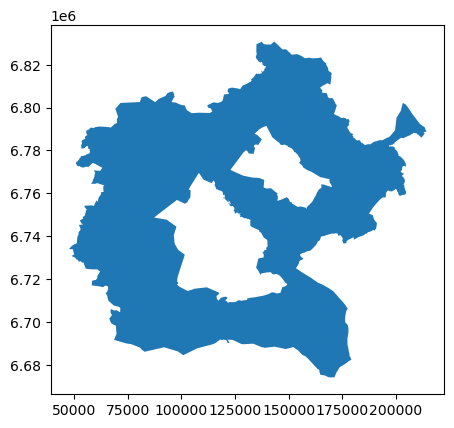

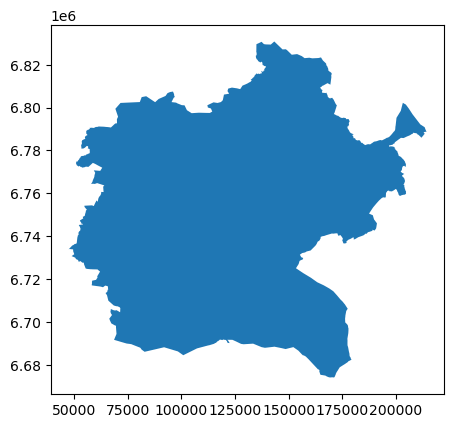

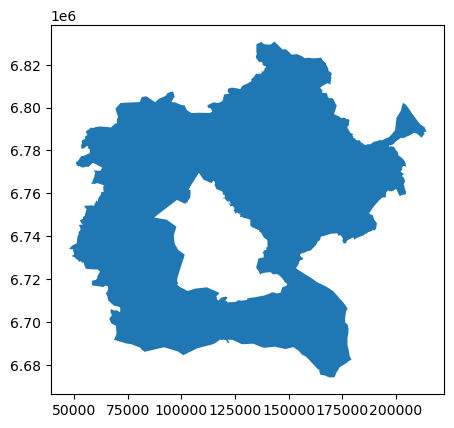

In [ ]:
import kommfylk
naboer_hol = kommfylk.nabokommuner("3044", aar=2022)
naboer_hemsedal = kommfylk.nabokommuner("3042", aar=2022)
naboer_hol_og_hemsedal = gg.diss(kommuner[kommuner.KOMMUNENR.isin(naboer_hol+naboer_hemsedal)])

naboer_hol_og_hemsedal.plot()

gg.tett_hull(naboer_hol_og_hemsedal).plot()

gg.tett_hull(naboer_hol_og_hemsedal, max_km2 = 1000).plot()